<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_610210976_0_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_2.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.01)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 610210976
period = 19.7873778963703  # Orbital period in days
epoch = 2122.05148543214
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.5]
folded_lc = folded_lc[folded_lc.time > -0.5]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_610210976_all_sector_lightcurve.csv


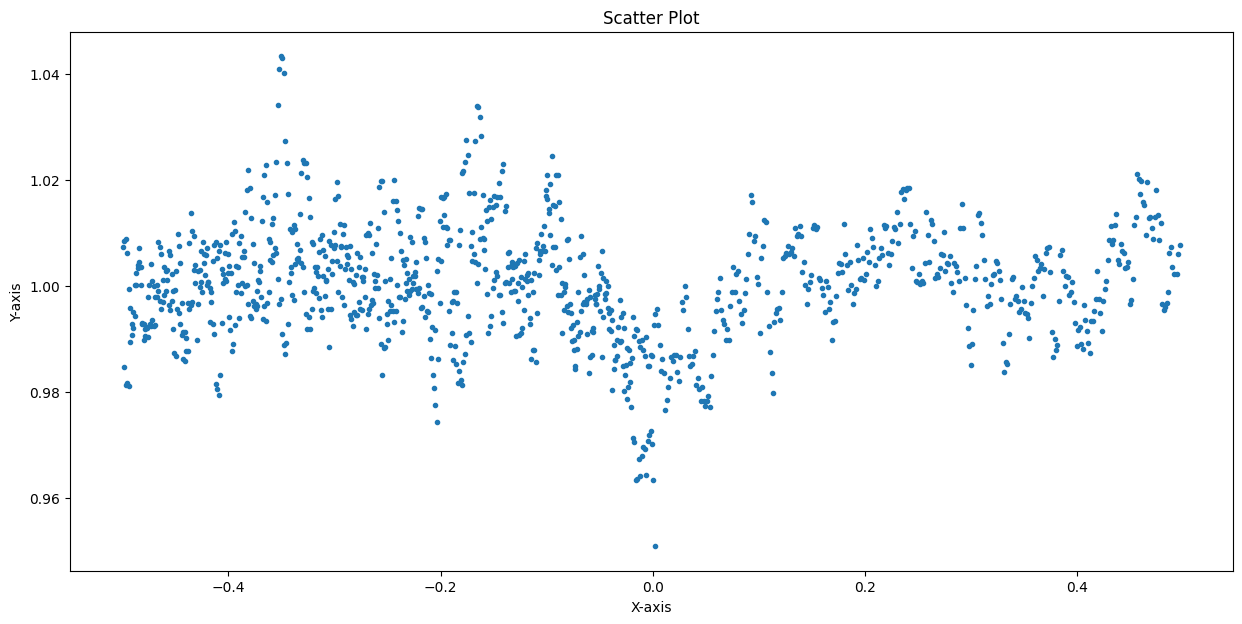

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([30])
target = tr.target(ID=ID, sectors=sectors, search_radius=7) # target radius shorted

Sector 30


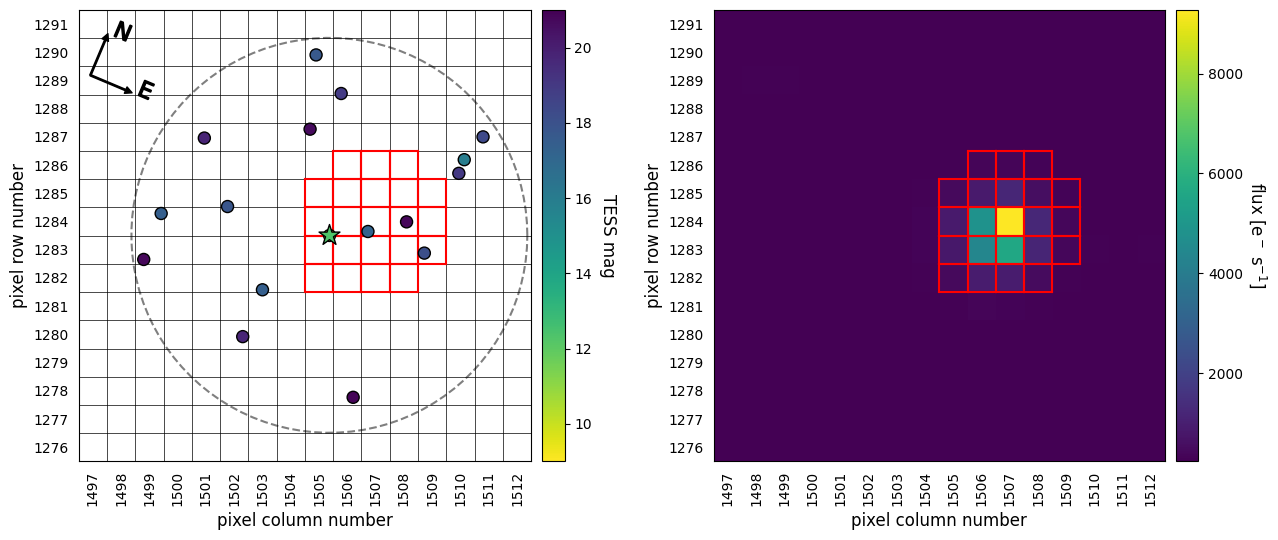

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,610210976,12.2975,NaN,NaN,NaN,18.127653,-16.998989,NaN,NaN,NaN,269.363000,0.000,0.000
1,439403362,9.0700,7.258,6.749,6.420,18.127700,-16.999000,0.138336,0.167787,NaN,NaN,0.166,103.505
2,439403361,17.1839,16.139,15.302,14.980,18.134994,-16.995226,NaN,NaN,NaN,NaN,28.674,61.809
3,610210977,20.7742,NaN,NaN,NaN,18.141842,-16.990362,NaN,NaN,NaN,NaN,57.887,57.553
4,439403363,17.3990,16.286,15.569,14.820,18.118983,-17.014553,NaN,NaN,NaN,NaN,63.484,208.044
5,610210991,18.0997,NaN,NaN,NaN,18.148013,-16.994864,NaN,NaN,NaN,0.197863,71.649,78.040
6,439401783,17.7684,16.740,16.134,15.586,18.105006,-17.001576,0.680000,0.494005,4366.0,0.584254,78.520,263.185
7,610210983,20.6956,NaN,NaN,NaN,18.114847,-16.980456,NaN,NaN,NaN,NaN,79.972,326.541
8,610210970,19.7439,NaN,NaN,NaN,18.119029,-17.024955,NaN,NaN,3740.0,-0.037732,98.079,197.618
9,610210982,18.9183,NaN,NaN,NaN,18.117999,-16.971271,NaN,NaN,5018.0,0.661864,105.177,341.576


In [7]:
ap_30 = np.array([[1505.0, 1282.0], [1505.0, 1283.0], [1505.0, 1284.0], [1505.0, 1285.0],
      [1506.0, 1282.0], [1506.0, 1283.0], [1506.0, 1284.0], [1506.0, 1285.0], [1506.0,
        1286.0], [1507.0, 1282.0], [1507.0, 1283.0], [1507.0, 1284.0], [1507.0, 1285.0],
      [1507.0, 1286.0], [1508.0, 1282.0], [1508.0, 1283.0], [1508.0, 1284.0], [1508.0,
        1285.0], [1508.0, 1286.0], [1509.0, 1283.0], [1509.0, 1284.0], [1509.0, 1285.0]])


apertures = np.array([ap_30])
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [18]:
# Missing values are assumed
target.update_star(ID=610210976, param='mass', value=0.1)
target.update_star(ID=610210976, param='rad', value=0.1)
# target.update_star(ID=ID, param='Teff', value=?)

In [19]:
tdepth = 16.909 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,610210976,12.2975,NaN,NaN,NaN,18.127653,-16.998989,0.100000,0.100000,NaN,269.363000,0.000,0.000,4.854202e-02,0.348337
1,439403362,9.0700,7.258,6.749,6.420,18.127700,-16.999000,0.138336,0.167787,NaN,NaN,0.166,103.505,9.505322e-01,0.017789
2,439403361,17.1839,16.139,15.302,14.980,18.134994,-16.995226,NaN,NaN,NaN,NaN,28.674,61.809,6.163096e-04,0.000000
3,610210977,20.7742,NaN,NaN,NaN,18.141842,-16.990362,NaN,NaN,NaN,NaN,57.887,57.553,2.170680e-05,0.000000
4,439403363,17.3990,16.286,15.569,14.820,18.118983,-17.014553,NaN,NaN,NaN,NaN,63.484,208.044,6.257389e-06,0.000000
5,610210991,18.0997,NaN,NaN,NaN,18.148013,-16.994864,NaN,NaN,NaN,0.197863,71.649,78.040,1.851210e-04,0.000000
6,439401783,17.7684,16.740,16.134,15.586,18.105006,-17.001576,0.680000,0.494005,4366.0,0.584254,78.520,263.185,4.311819e-08,0.000000
7,610210983,20.6956,NaN,NaN,NaN,18.114847,-16.980456,NaN,NaN,NaN,NaN,79.972,326.541,6.066413e-07,0.000000
8,610210970,19.7439,NaN,NaN,NaN,18.119029,-17.024955,NaN,NaN,3740.0,-0.037732,98.079,197.618,1.744794e-09,0.000000
9,610210982,18.9183,NaN,NaN,NaN,18.117999,-16.971271,NaN,NaN,5018.0,0.661864,105.177,341.576,2.658820e-07,0.000000


In [20]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Insufficient information to validate 610210976. Please ensure a stellar mass (in M_Sun), radius (in R_Sun), Teff (in K), and plx (in mas) are provided in the .stars dataframe.
CPU times: user 11.4 s, sys: 608 ms, total: 12 s
Wall time: 27.1 s


In [21]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.83333333
NFPP = 0.16666667


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
1,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
2,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
3,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
4,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
5,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
6,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
7,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
8,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556
9,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556


In [ ]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [ ]:
# %%time

# FPPs = np.zeros(20)
# NFPPs = np.zeros(20)
# for i in range(20):
#     target.calc_probs(time=lc.time.value,
#                       flux_0=lc.flux.value,
#                       flux_err_0=np.mean(lc.flux_err.value),
#                       P_orb=P_orb,
#                       parallel=True,
#                       verbose=0)
#     FPPs[i] = target.FPP
#     NFPPs[i] = target.NFPP

# meanFPP = np.mean(FPPs)
# stdvFPP = np.std(FPPs)
# print("FPP =", meanFPP, "+/-", stdvFPP)

# meanNFPP = np.mean(NFPPs)
# stdvNFPP = np.std(NFPPs)
# print("NFPP =", meanNFPP, "+/-", stdvNFPP)

TIC 610210976 is missing parameters.